# Medidas de posição e dispersão

## Base de dados

In [1]:
import numpy as np
import statistics
from scipy import stats
import math
import pandas as pd

In [2]:
dados = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
                  157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
                  163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
                  173])
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

## Média aritmética simples

In [3]:
print(dados.sum(), '/', len(dados), '=', dados.sum() / len(dados), '(Média (mean))')

6415 / 40 = 160.375 (Média (mean))


In [4]:
dados.mean()

160.375

In [5]:
statistics.mean(dados)

160

## Moda

In [6]:
statistics.mode(dados)

160

In [7]:
print(f'A Moda dos dados é {stats.mode(dados)[0][0]} e ela aparece {stats.mode(dados)[1][0]} vezes.')
stats.mode(dados)

A Moda dos dados é 160 e ela aparece 5 vezes.


ModeResult(mode=array([160]), count=array([5]))

## Mediana

In [8]:
dados_impar = [150, 151, 152, 152, 153, 154, 155, 155, 155]

### Cálculo manual (ímpar)

In [9]:
posicao = len(dados_impar) / 2
print(posicao)
posicao = math.ceil(posicao)
posicao

4.5


5

In [10]:
dados_impar[posicao - 1]

153

### Cálculo manual (par)

In [11]:
posicao = len(dados) // 2
print(posicao)

mediana = (dados[posicao - 1] + dados[posicao]) / 2
print(mediana)

np.mean([dados[posicao - 1], dados[posicao]])

20
160.0


160.0

### Bibliotecas

In [12]:
np.median(dados_impar), statistics.median(dados_impar), pd.DataFrame(dados_impar).mean()

(153.0,
 153,
 0    153.0
 dtype: float64)

In [13]:
np.median(dados), statistics.median(dados), pd.DataFrame(dados).mean()

(160.0,
 160.0,
 0    160.375
 dtype: float64)

In [14]:
np.median(dados_impar)

153.0

In [15]:
np.median(dados)

160.0

In [16]:
statistics.median(dados_impar)

153

In [17]:
statistics.median(dados)

160.0

In [18]:
pd.DataFrame(dados_impar).median()

0    153.0
dtype: float64

In [19]:
pd.DataFrame(dados).median()

0    160.0
dtype: float64

## Média aritmética ponderada

In [20]:
notas = np.array([9, 8, 7, 3])
pesos = np.array([1, 2, 3, 4])

In [21]:
np.mean(notas)

6.75

In [22]:
(9 * 1 + 8 * 2 + 7 * 3 + 3 * 4) / (1 + 2 + 3 + 4)

5.8

In [23]:
media_ponderada = (notas * pesos).sum() / pesos.sum()
print(f'A Média Ponderada é {media_ponderada}.')

np.average(notas, weights=pesos)

A Média Ponderada é 5.8.


5.8

## Média aritmética, moda e mediana com distribuição de frequência (dados agrupados)

In [24]:
dados2 = {'inferior': [150, 154, 158, 162, 166, 170],
         'superior': [154, 158, 162, 166, 170, 174],
         'fi': [5, 9, 11, 7, 5, 3]}

In [25]:
dados2 = {'inferior': [150, 154, 158, 162, 166, 170],
         'superior': [154, 158, 162, 166, 170, 174],
         'fi': [5, 9, 11, 7, 5, 3]}
dataset = pd.DataFrame(dados2)
dataset['xi'] = (dataset['inferior'] + dataset['superior']) / 2
dataset['fi.xi'] = dataset['fi'] * dataset['xi']
Fi = []
somatorio = 0
for i in range(len(dataset)):
    Fi.append(somatorio + dataset['fi'][i])
    somatorio += dataset['fi'][i]
dataset['Fi'] = Fi

In [26]:
import pandas as pd
dataset = pd.DataFrame(dados2)
dataset

,inferior,superior,fi
0,150,154,5
1,154,158,9
2,158,162,11
3,162,166,7
4,166,170,5
5,170,174,3


In [27]:
dataset['xi'] = (dataset['inferior'] + dataset['superior']) / 2
dataset

,inferior,superior,fi,xi
0,150,154,5,152.0
1,154,158,9,156.0
2,158,162,11,160.0
3,162,166,7,164.0
4,166,170,5,168.0
5,170,174,3,172.0


In [28]:
dataset['fi.xi'] = dataset['fi'] * dataset['xi']
dataset

,inferior,superior,fi,xi,fi.xi
0,150,154,5,152.0,760.0
1,154,158,9,156.0,1404.0
2,158,162,11,160.0,1760.0
3,162,166,7,164.0,1148.0
4,166,170,5,168.0,840.0
5,170,174,3,172.0,516.0


In [29]:
dataset['Fi'] = 0
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,0
1,154,158,9,156.0,1404.0,0
2,158,162,11,160.0,1760.0,0
3,162,166,7,164.0,1148.0,0
4,166,170,5,168.0,840.0,0
5,170,174,3,172.0,516.0,0


In [30]:
len(dataset)

6

In [31]:
Fi = []
somatorio = 0
for i in range(len(dataset)):
    Fi.append(somatorio + dataset['fi'][i])
    somatorio += dataset['fi'][i]
print(Fi)

dataset['Fi'] = Fi
dataset

[5, 14, 25, 32, 37, 40]


,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5
1,154,158,9,156.0,1404.0,14
2,158,162,11,160.0,1760.0,25
3,162,166,7,164.0,1148.0,32
4,166,170,5,168.0,840.0,37
5,170,174,3,172.0,516.0,40


### Média

In [32]:
print(dataset['fi.xi'].sum(), '/', dataset['fi'].sum(), '=', dataset['fi.xi'].sum() / dataset['fi'].sum())

6428.0 / 40 = 160.7


In [33]:
dataset['fi'].sum(), dataset['fi.xi'].sum()

(40, 6428.0)

In [34]:
dataset['fi.xi'].sum() / dataset['fi'].sum()

160.7

### Moda

In [35]:
dataset['fi'].max()

11

In [36]:
dataset[dataset['fi'] == dataset['fi'].max()]

,inferior,superior,fi,xi,fi.xi,Fi
2,158,162,11,160.0,1760.0,25


In [37]:
dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

160.0

### Mediana

In [38]:
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5
1,154,158,9,156.0,1404.0,14
2,158,162,11,160.0,1760.0,25
3,162,166,7,164.0,1148.0,32
4,166,170,5,168.0,840.0,37
5,170,174,3,172.0,516.0,40


In [39]:
fi_2 = dataset['fi'].sum() / 2
fi_2

20.0

In [40]:
dataset['fi'][0]

5

In [41]:
limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0

for i in range(len(dataset)):
    limite_inferior = dataset['inferior'][i]
    print(limite_inferior)
    frequencia_classe = dataset['fi'][i]
    print(frequencia_classe)
    print(dataset['Fi'][i])
    if dataset['Fi'][i] >= dataset['fi'].sum()/2:
        Fi_anterior = dataset['Fi'][i-1]
        break
        
h = dataset['superior'][0] - dataset['inferior'][0]
h

150
5
5
154
9
14
158
11
25


4

In [42]:
# limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
# for linha in dataset.iterrows():
#     #print(linha)
#     limite_inferior = linha[1][0]
#     frequencia_classe = linha[1][2]
#     id_frequencia_anterior = linha[0]
#     if linha[1][5] >= fi_2:
#         id_frequencia_anterior -= 1
#         break

In [43]:
limite_inferior, frequencia_classe, Fi_anterior

(158, 11, 14)

In [44]:
# limite_inferior, frequencia_classe, id_frequencia_anterior

In [45]:
# Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
# Fi_anterior

In [46]:
mediana = limite_inferior + (((dataset['fi'].sum()/2 - Fi_anterior) * h) / frequencia_classe)
mediana

160.1818181818182

In [47]:
mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe
mediana

160.1818181818182

### Função completa

In [48]:
def get_statistics(dataFrame):
    media = dataset['fi.xi'].sum() / dataset['fi'].sum()
    moda = dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]
    
    limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0

    for i in range(len(dataset)):
        limite_inferior = dataset['inferior'][i]
        frequencia_classe = dataset['fi'][i]
        if dataset['Fi'][i] >= dataset['fi'].sum()/2:
            Fi_anterior = dataset['Fi'][i-1]
            break

    h = dataset['superior'][0] - dataset['inferior'][0]
    
    mediana = limite_inferior + (((dataset['fi'].sum()/2 - Fi_anterior) * h) / frequencia_classe)
    
    return media, moda, mediana

In [49]:
def get_estatisticas(dataframe):
    media = dataset['fi.xi'].sum() / dataset['fi'].sum()
    moda = dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

    fi_2 = dataset['fi'].sum() / 2
    limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
    for i, linha in enumerate(dataset.iterrows()):
        limite_inferior = linha[1][0]
        frequencia_classe = linha[1][2]
        id_frequencia_anterior = linha[0]
        if linha[1][5] >= fi_2:
            id_frequencia_anterior -= 1
            break
    Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
    mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe

    return media, moda, mediana

In [50]:
get_statistics(dataset)

(160.7, 160.0, 160.1818181818182)

In [51]:
get_estatisticas(dataset)

(160.7, 160.0, 160.1818181818182)

## Média geométrica, harmônica e quadrática

### Média geométrica

In [52]:
from scipy.stats.mstats import gmean

In [53]:
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [54]:
gmean(dados)

160.26958390038902

### Média harmônica

In [55]:
from scipy.stats.mstats import hmean

In [56]:
hmean(dados)

160.16471947994674

### Média quadrática

In [57]:
def qmean(data):
    return math.sqrt(sum(n ** 2 for n in data) / len(data))

qmean(dados)

160.48091786876097

In [58]:
def quadratic_mean(dados):
    return math.sqrt(sum(n * n for n in dados) / len(dados))

In [59]:
quadratic_mean(dados)

160.48091786876097

## Quartis

In [60]:
dados_impar = [150, 151, 152, 152, 153, 154, 155, 155, 155]

In [61]:
pd.DataFrame(dados_impar).describe()

,0
count,9.000000
mean,153.000000
std,1.870829
min,150.000000
25%,152.000000
50%,153.000000
75%,155.000000
max,155.000000


### Cálculo manual

In [62]:
print(f'Mediana ou Quartil 2 (Q2): {np.median(dados_impar)}.')

Mediana ou Quartil 2 (Q2): 153.0.


In [63]:
posicao_mediana = math.floor(len(dados_impar) / 2)
posicao_mediana

4

In [64]:
esquerda = dados_impar[0:posicao_mediana]
esquerda

[150, 151, 152, 152]

In [65]:
print(f'Quartil 1 (Q1): {np.median(esquerda)}.')

Quartil 1 (Q1): 151.5.


In [66]:
direita = dados_impar[posicao_mediana + 1:]
direita

[154, 155, 155, 155]

In [67]:
print(f'Quartil 3 (Q3): {np.median(direita)}.')

Quartil 3 (Q3): 155.0.


### Bibliotecas

#### numpy

In [68]:
print(f'Q2: {np.quantile(dados_impar, 0.5)}')

Q2: 153.0


In [69]:
print(f'Q1: {np.quantile(dados_impar, 0.25)}')

Q1: 152.0


In [70]:
print(f'Q3: {np.quantile(dados_impar, 0.75)}')

Q3: 155.0


In [71]:
esquerda2 = dados_impar[0:posicao_mediana + 1]
esquerda2

[150, 151, 152, 152, 153]

In [72]:
np.median(esquerda2)

152.0

In [73]:
np.quantile(dados, 0.25), np.quantile(dados, 0.50), np.quantile(dados, 0.75)

(155.75, 160.0, 164.0)

#### scipy

In [74]:
stats.scoreatpercentile(dados, 25), stats.scoreatpercentile(dados, 50), stats.scoreatpercentile(dados, 75)

(155.75, 160.0, 164.0)

#### pandas

In [75]:
dataset = pd.DataFrame(dados)
dataset.head()

,0
0,150
1,151
2,152
3,152
4,153


In [76]:
len(dataset)

40

In [77]:
dataset.quantile(q=[0.25, 0.5, 0.75]) # Não precisa colocar o "q="

,0
0.25,155.75
0.50,160.00
0.75,164.00


In [78]:
dataset.quantile(q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,0
0.1,152.9
0.2,155.0
0.3,156.0
0.4,159.2
0.5,160.0
0.6,161.0
0.7,163.3
0.8,165.2
0.9,168.1


In [79]:
dataset.describe()

,0
count,40.000000
mean,160.375000
std,5.903877
min,150.000000
25%,155.750000
50%,160.000000
75%,164.000000
max,173.000000


## Quartis com distribuição de frequência (dados agrupados)

In [80]:
dados2 = {'inferior': [150, 154, 158, 162, 166, 170],
         'superior': [154, 158, 162, 166, 170, 174],
         'fi': [5, 9, 11, 7, 5, 3]}
dataset = pd.DataFrame(dados2)
dataset['xi'] = (dataset['inferior'] + dataset['superior']) / 2
dataset['fi.xi'] = dataset['fi'] * dataset['xi']
Fi = []
somatorio = 0
for i in range(len(dataset)):
    Fi.append(somatorio + dataset['fi'][i])
    somatorio += dataset['fi'][i]
dataset['Fi'] = Fi

In [81]:
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5
1,154,158,9,156.0,1404.0,14
2,158,162,11,160.0,1760.0,25
3,162,166,7,164.0,1148.0,32
4,166,170,5,168.0,840.0,37
5,170,174,3,172.0,516.0,40


In [82]:
def get_quantile(dataframe, q1 = True): # Se q1 = False, estamos buscando Q3.
    if q1 == True:
        fi_4 = dataset['fi'].sum() / 4
    else:
        fi_4 = 3 * dataset['fi'].sum() / 4
    
    limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0

    for i in range(len(dataset)):
        limite_inferior = dataset['inferior'][i]
        frequencia_classe = dataset['fi'][i]
        if dataset['Fi'][i] >= fi_4:
            Fi_anterior = dataset['Fi'][i-1]
            break

    h = dataset['superior'][0] - dataset['inferior'][0]
    
    q = limite_inferior + (((fi_4 - Fi_anterior) * h) / frequencia_classe)
    
    return q

In [83]:
get_quantile(dados), get_quantile(dados, q1 = False)

(156.22222222222223, 164.85714285714286)

In [84]:
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [85]:
pd.DataFrame(dados).describe()

,0
count,40.000000
mean,160.375000
std,5.903877
min,150.000000
25%,155.750000
50%,160.000000
75%,164.000000
max,173.000000


In [86]:
print(f'Q1: {get_quantile(dados)}.')
print(f'Q2: {get_statistics(dados)[1]}.')
print(f'Q3: {get_quantile(dados, q1 = False)}.')

Q1: 156.22222222222223.
Q2: 160.0.
Q3: 164.85714285714286.


In [87]:
get_quantile(dataset), get_quantile(dataset, q1 = False)

(156.22222222222223, 164.85714285714286)

In [88]:
def get_quartil(dataframe, q1 = True):
    if q1 == True:
        fi_4 = dataset['fi'].sum() / 4
    else:
        fi_4 = (3 * dataset['fi'].sum()) / 4

    limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
    for linha in dataset.iterrows():
        limite_inferior = linha[1][0]
        frequencia_classe = linha[1][2]
        id_frequencia_anterior = linha[0]
        if linha[1][5] >= fi_4:
            id_frequencia_anterior -= 1
            break
    Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
    q = limite_inferior + ((fi_4 - Fi_anterior) * 4) / frequencia_classe

    return q

In [89]:
get_quartil(dados), get_quartil(dados, q1 = False)

(156.22222222222223, 164.85714285714286)

## Percentis

In [90]:
np.median(dados)

160.0

In [91]:
np.quantile(dados, 0.5)

160.0

In [92]:
np.percentile(dados, 50)

160.0

In [93]:
np.percentile(dados, 5), np.percentile(dados, 10), np.percentile(dados, 90)

(151.95, 152.9, 168.1)

**Aqui abaixo eu resolvi fazer uma "brincadeira" onde eu transformo o array retornado da função 'np.percentile' em lista (list()), depois transformo em um dataframe do pandas (pd.DataFrame()), para então transforma-lo em uma lista novamente, agora com listas dentro dela (.values.tolist()).**

**Se deixasse somente no 'np.percentile', retornaria um array. No 'list()', retornaria uma lista normal. No 'pd.DataFrame' retornaria um dataframe do pandas.**

In [94]:
pd.DataFrame(list(np.percentile(dados, [10, 20, 30, 40, 50, 60, 70, 80, 90]))).values.tolist()

[[152.9],
 [155.0],
 [156.0],
 [159.2],
 [160.0],
 [161.0],
 [163.3],
 [165.2],
 [168.1]]

In [95]:
stats.scoreatpercentile(dados, 5), stats.scoreatpercentile(dados, 10), stats.scoreatpercentile(dados, 90)

(151.95000000000002, 152.89999999999998, 168.1)

In [96]:
pd.DataFrame(dados).quantile([0.05, 0.10, 0.90])

,0
0.05,151.95
0.10,152.90
0.90,168.10


## Exercício

In [97]:
dataset_ex = pd.read_csv('Bases de dados/census.csv')

In [98]:
dataset_ex.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [99]:
print('Média Aritmética Idade Pandas:', dataset_ex['age'].mean())

Média Aritmética Idade Pandas: 38.58164675532078


In [100]:
print('Média Aritmética Idade Numpy:', np.mean(dataset_ex['age']))

Média Aritmética Idade Numpy: 38.58164675532078


In [101]:
print('Média Aritmética Idade Statistics:', statistics.mean(dataset_ex['age']))

Média Aritmética Idade Statistics: 38.58164675532078


In [102]:
print('Média Harmônica Idade:', hmean(dataset_ex['age']))

Média Harmônica Idade: 33.91874139089839


In [103]:
print('Média Geomátrica Idade:', gmean(dataset_ex['age']))

Média Geomátrica Idade: 36.210879158177256


In [104]:
print('Média Quadrática Idade:', qmean(dataset_ex['age']))

Média Quadrática Idade: 40.9218664329987


In [105]:
print('Mediana Idade Pandas:', dataset_ex['age'].median())

Mediana Idade Pandas: 37.0


In [106]:
print('Mediana Idade Numpy:', np.median(dataset_ex['age']))

Mediana Idade Numpy: 37.0


In [107]:
print('Mediana Idade Statistcs:', statistics.median(dataset_ex['age']))

Mediana Idade Statistcs: 37


In [137]:
moda = statistics.mode(dataset_ex['age'])
vezes = dataset_ex[dataset_ex['age'] == statistics.mode(dataset_ex['age'])]['age'].count()
minimo, maximo = dataset_ex['age'].min(), dataset_ex['age'].max()
print(f'Moda Idade: {moda}. Aparece {vezes} vezes em {len(dataset_ex)} linhas.')
print(f'Um total de {vezes / len(dataset_ex) * 100:.2f}%.')
print(f'As idades vão de {minimo} até {maximo} anos.')

Moda Idade: 36. Aparece 898 vezes em 32561 linhas.
Um total de 2.76%.
As idades vão de 17 até 90 anos.


## Medidas de dispersão

### Amplitude total e diferença interquartil

In [138]:
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [156]:
print(f'Amplitude Total (Xmax - Xmin): {dados.max() - dados.min()}')

Amplitude Total (Xmax - Xmin): 23


In [143]:
q1 = np.quantile(dados, 0.25)
q3 = np.quantile(dados, 0.75)
print(f'Q1: {q1}. Q3: {q3}.')

Q1: 155.75. Q3: 164.0.


In [157]:
diferenca_interquartil = q3 - q1
print(f'Diferença Interquartil (Q3 - Q1): {diferenca_interquartil}')

Diferença Interquartil (Q3 - Q1): 8.25


In [158]:
inferior = q1 - (1.5 * diferenca_interquartil)
print(f'Cerca Inferior (Q1 - (1.5 * Diferença Interquartil)): {inferior}')

Cerca Inferior (Q1 - (1.5 * Diferença Interquartil)): 143.375


In [160]:
superior = q3 + (1.5 * diferenca_interquartil)
print(f'Cerca Superior (Q3 + (1.5 * Diferença Interquartil)): {superior}')

Cerca Superior (Q3 + (1.5 * Diferença Interquartil)): 176.375


In [155]:
print(f'Se na base de dados você encontrar alguém com menos de {inferior}m \n ou mais de {superior}m, essa pessoa pode ser considerada um outlier \n pois está fora das cercas inferior e superior.')

Se na base de dados você encontrar alguém com menos de 143.375m 
 ou mais de 176.375m, essa pessoa pode ser considerada um outlier 
 pois está fora das cercas inferior e superior.


In [169]:
np.quantile(dataset_ex['age'], 0.75) - np.quantile(dataset_ex['age'], 0.25)

20.0

In [164]:
np.quantile(dataset_ex['age'], 0.25) - (1.5 * (np.quantile(dataset_ex['age'], 0.75) - np.quantile(dataset_ex['age'], 0.25))), np.quantile(dataset_ex['age'], 0.75) + (1.5 * (np.quantile(dataset_ex['age'], 0.75) - np.quantile(dataset_ex['age'], 0.25)))

(-2.0, 78.0)

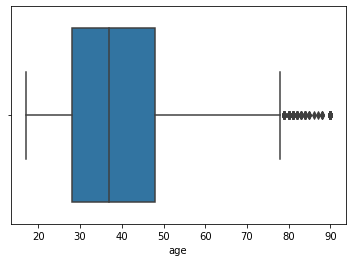

In [174]:
import seaborn as sns
sns.boxplot(x = dataset_ex['age']);

In [175]:
dataset_ex['age'].min()

17

### Variância, desvio padrão e coeficiente de variação

In [178]:
dados_impar = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155])

In [179]:
dados_impar

array([150, 151, 152, 152, 153, 154, 155, 155, 155])

#### Cálculo manual

In [200]:
dados_impar.sum()

1377

In [199]:
len(dados_impar)

9

In [203]:
media = dados_impar.sum() / len(dados_impar)
print(f'Média Dados Ímpar ({dados_impar.sum()} / {len(dados_impar)}): {media}')

Média Dados Ímpar (1377 / 9): 153.0


In [242]:
dados_impar[0]

150

In [265]:
des = []
for i in range(len(dados_impar)):
    des.append(f'{dados_impar[i]} - {int(media)}') # for i in range(len(dados_impar))
des

['150 - 153',
 '151 - 153',
 '152 - 153',
 '152 - 153',
 '153 - 153',
 '154 - 153',
 '155 - 153',
 '155 - 153',
 '155 - 153']

In [272]:
desvio = abs(dados_impar - media)
print(f'Desvio Dados ímpar (absoluto de\n\n{des}):\n\n{desvio}')

Desvio Dados ímpar (absoluto de

['150 - 153', '151 - 153', '152 - 153', '152 - 153', '153 - 153', '154 - 153', '155 - 153', '155 - 153', '155 - 153']):

[3. 2. 1. 1. 0. 1. 2. 2. 2.]


In [275]:
print('Eleva-se o desvio adquirido ao quadrado para que os desvios \n maiores sejam mais "penalizados".')
desvio_2 = desvio ** 2
print('')
print(f'Desvio ao Quadrado: {desvio_2}')

Eleva-se o desvio adquirido ao quadrado para que os desvios 
 maiores sejam mais "penalizados".

Desvio ao Quadrado: [9. 4. 1. 1. 0. 1. 4. 4. 4.]


In [277]:
print('Soma os valores para utilizar na fórmula para obter a Variância.')
soma_desvio = desvio_2.sum()
print('')
print(f'Soma dos desvios elevados ao quadrado: {soma_desvio}')

Soma os valores para utilizar na fórmula para obter a Variância.

Soma dos desvios elevados ao quadrado: 28.0


In [281]:
variancia = soma_desvio / len(dados_impar)
print(f'Variância ({soma_desvio} / {len(dados_impar)})): {variancia}')

Variância (28.0 / 9)): 3.111111111111111


In [282]:
desvio_padrão = math.sqrt(variancia)
print(f'Desvio Padrão (Raiz Quadrada de {variancia}): {dp}')

Desvio Padrão (Raiz Quadrada de 3.111111111111111): 1.7638342073763937


In [285]:
coeficiente_de_variacao = (desvio_padrão / media) * 100
print(f'Coeficiente de Variação ({desvio_padrão} / {media} * 100): \n{cv}')

Coeficiente de Variação (1.7638342073763937 / 153.0 * 100): 
1.1528328152786886


In [195]:
def get_variance_std_dev_coef_var(dataset):
    media = dataset.sum() / len(dataset)
    variancia = (abs(dataset - media) ** 2).sum() / len(dataset)
    desvio_padrao = math.sqrt(variancia)
    coef_var = desvio_padrao / media * 100
    return print(f'Variância: {variancia}\nDesvio Padrão: {desvio_padrao}\nCoeficiente de Variação: {coef_var}')

In [196]:
get_variance_std_dev_coef_var(dados_impar)

Variância: 3.111111111111111
Desvio Padrão: 1.7638342073763937
Coeficiente de Variação: 1.1528328152786886


In [197]:
def get_variancia_desvio_padrao_coeficiente(dataset):
    media = dataset.sum() / len(dataset)
    desvio = abs(dados_impar - media)
    desvio = desvio ** 2
    soma_desvio = desvio.sum()
    variancia = soma_desvio / len(dados_impar)
    dp = math.sqrt(variancia)
    return variancia, dp, (dp / media) * 100

In [198]:
get_variancia_desvio_padrao_coeficiente(dados_impar)

(3.111111111111111, 1.7638342073763937, 1.1528328152786886)

#### Bibliotecas

In [292]:
print(f'Variância Dados Ímpar Numpy: {np.var(dados_impar)}')

np.var(dados_impar)

Variância Dados Ímpar Numpy: 3.111111111111111


3.111111111111111

In [293]:
print(f'Desvio Padrão Dados Ímpar Numpy: {np.std(dados_impar)}')

np.std(dados_impar)

Desvio Padrão Dados Ímpar Numpy: 1.7638342073763937


1.7638342073763937

In [294]:
print(f'Variância Dados Numpy: {np.var(dados)}')

np.var(dados)

Variância Dados Numpy: 33.984375


33.984375

In [295]:
print(f'Desvio Padrão Dados Numpy: {np.std(dados)}')

np.std(dados)

Desvio Padrão Dados Numpy: 5.829611908180509


5.829611908180509

In [296]:
print(f'Variância Dados Statistics: {statistics.variance(dados)}')

statistics.variance(dados)

Variância Dados Statistics: 34


34

In [297]:
print(f'Desvio Padrão Dados Statistics: {statistics.stdev(dados)}')

statistics.stdev(dados)

Desvio Padrão Dados Statistics: 5.830951894845301


5.830951894845301

In [298]:
from scipy import ndimage
ndimage.variance(dados)

33.984375

In [299]:
stats.tstd(dados, ddof = 0)

5.829611908180509

In [300]:
stats.variation(dados_impar) * 100

1.1528328152786886

In [301]:
stats.variation(dados) * 100

3.634987939629312

### Desvio padrão com dados agrupados

In [302]:
dataset
# fi indica quantos elementos temos em cada classe
# xi é o ponto médio da classe
# Fi é a frequência acumulada

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5
1,154,158,9,156.0,1404.0,14
2,158,162,11,160.0,1760.0,25
3,162,166,7,164.0,1148.0,32
4,166,170,5,168.0,840.0,37
5,170,174,3,172.0,516.0,40


In [303]:
dataset['xi_2'] = dataset['xi'] ** 2 
dataset

,inferior,superior,fi,xi,fi.xi,Fi,xi_2
0,150,154,5,152.0,760.0,5,23104.0
1,154,158,9,156.0,1404.0,14,24336.0
2,158,162,11,160.0,1760.0,25,25600.0
3,162,166,7,164.0,1148.0,32,26896.0
4,166,170,5,168.0,840.0,37,28224.0
5,170,174,3,172.0,516.0,40,29584.0


In [304]:
dataset['fi_xi_2'] = dataset['fi'] * dataset['xi_2']
dataset

,inferior,superior,fi,xi,fi.xi,Fi,xi_2,fi_xi_2
0,150,154,5,152.0,760.0,5,23104.0,115520.0
1,154,158,9,156.0,1404.0,14,24336.0,219024.0
2,158,162,11,160.0,1760.0,25,25600.0,281600.0
3,162,166,7,164.0,1148.0,32,26896.0,188272.0
4,166,170,5,168.0,840.0,37,28224.0,141120.0
5,170,174,3,172.0,516.0,40,29584.0,88752.0


In [305]:
dataset.columns

Index(['inferior', 'superior', 'fi', 'xi', 'fi.xi', 'Fi', 'xi_2', 'fi_xi_2'], dtype='object')

In [306]:
dataset = dataset[['inferior', 'superior', 'fi', 'xi', 'fi.xi', 'xi_2', 'fi_xi_2', 'Fi']]
dataset

,inferior,superior,fi,xi,fi.xi,xi_2,fi_xi_2,Fi
0,150,154,5,152.0,760.0,23104.0,115520.0,5
1,154,158,9,156.0,1404.0,24336.0,219024.0,14
2,158,162,11,160.0,1760.0,25600.0,281600.0,25
3,162,166,7,164.0,1148.0,26896.0,188272.0,32
4,166,170,5,168.0,840.0,28224.0,141120.0,37
5,170,174,3,172.0,516.0,29584.0,88752.0,40


In [309]:
desvio_padrao = math.sqrt((dataset['fi_xi_2'].sum() / dataset['fi'].sum()) - ((dataset['fi.xi'].sum() / dataset['fi'].sum()) ** 2))
desvio_padrao

5.719265687131764

In [310]:
dp = math.sqrt(dataset['fi_xi_2'].sum() / dataset['fi'].sum() - math.pow(dataset['fi.xi'].sum() / dataset['fi'].sum(), 2))
dp

5.719265687131764

## Testes com algoritmos de classificação

In [312]:
dataset = pd.read_csv('Bases de dados/credit_data.csv')

In [313]:
dataset.dropna(inplace=True) # Ou dataset = dataset.dropna()
dataset.shape

(1997, 5)

In [314]:
dataset

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [315]:
X = dataset.iloc[:,1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [316]:
y = dataset.iloc[:,4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [400]:
resultados_naive_bayes = []
resultados_logistica = []
resultados_forest = []

for i in range(30):
    X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)
    
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_treinamento, y_treinamento)
    previsoes_naive_bayes = naive_bayes.predict(X_teste)
    resultados_naive_bayes.append(accuracy_score(y_teste, previsoes_naive_bayes))
    
    logistica = LogisticRegression()
    logistica.fit(X_treinamento, y_treinamento)
    previsoes_logistica = logistica.predict(X_teste)
    resultados_logistica.append(accuracy_score(y_teste, previsoes_logistica))
    
    forest = RandomForestClassifier()
    forest.fit(X_treinamento, y_treinamento)
    previsoes_forest = forest.predict(X_teste)
    resultados_forest.append(accuracy_score(y_teste, previsoes_forest))

In [401]:
print(resultados_naive_bayes)

[0.925, 0.925, 0.9325, 0.925, 0.92, 0.905, 0.9175, 0.9175, 0.9125, 0.9325, 0.9225, 0.9125, 0.935, 0.9175, 0.925, 0.9175, 0.9275, 0.92, 0.9325, 0.92, 0.93, 0.905, 0.9175, 0.9325, 0.9425, 0.9375, 0.94, 0.92, 0.935, 0.925]


In [402]:
print(resultados_logistica)

[0.9325, 0.91, 0.9125, 0.9225, 0.9075, 0.89, 0.91, 0.9075, 0.8775, 0.915, 0.9175, 0.9, 0.925, 0.9175, 0.9025, 0.9125, 0.9525, 0.91, 0.9225, 0.9075, 0.925, 0.905, 0.9075, 0.945, 0.9225, 0.9275, 0.9225, 0.9175, 0.91, 0.9]


In [403]:
print(resultados_forest)

[0.975, 0.9875, 0.985, 0.9925, 0.9825, 0.9825, 0.99, 0.98, 0.98, 0.99, 0.9825, 0.98, 0.975, 0.985, 0.98, 0.975, 0.9875, 0.9875, 0.9925, 0.985, 0.9775, 0.975, 0.985, 0.985, 0.985, 0.995, 0.995, 0.98, 0.9875, 0.99]


In [404]:
type(resultados_naive_bayes)

list

In [405]:
resultados_naive_bayes_array = np.array(resultados_naive_bayes)
resultados_logistica_array = np.array(resultados_logistica)
resultados_forest_array = np.array(resultados_forest)

In [406]:
type(resultados_naive_bayes_array)

numpy.ndarray

### Média

In [407]:
print(f'Média dos resultados de Acurácia do Algoritmo Naive Bayes:\n{np.mean(resultados_naive_bayes)} ({np.mean(resultados_naive_bayes)*100:.2f})%')
print()
print(f'Média dos resultados de Acurácia do Algoritmo Regressão Logística:\n{np.mean(resultados_logistica)} ({np.mean(resultados_logistica)*100:.2f}%)')
print()
print(f'Média dos resultados de Acurácia do Algoritmo Random Forest:\n{np.mean(resultados_forest)} ({np.mean(resultados_forest)*100:.2f}%)')

Média dos resultados de Acurácia do Algoritmo Naive Bayes:
0.92425 (92.42)%

Média dos resultados de Acurácia do Algoritmo Regressão Logística:
0.9145 (91.45%)

Média dos resultados de Acurácia do Algoritmo Random Forest:
0.9843333333333333 (98.43%)


In [408]:
resultados_naive_bayes_array.mean(), resultados_logistica_array.mean(), resultados_forest_array.mean()

(0.92425, 0.9145, 0.9843333333333333)

### Moda

In [394]:
statistics.mode(resultados_naive_bayes), statistics.mode(resultados_logistica), statistics.mode(resultados_forest)

(0.925, 0.91, 0.985)

In [399]:
print(f'Moda dos resultados de Acurácia do Algoritmo Naive Bayes:\n{stats.mode(resultados_naive_bayes)[0][0]} ({stats.mode(resultados_naive_bayes)[0][0]*100:.2f}%)\nO resultado aparece {stats.mode(resultados_naive_bayes)[1][0]} vezes nos 30 testes realizados.')
print()
print(f'Moda dos resultados de Acurácia do Algoritmo Regressão Logística:\n{stats.mode(resultados_logistica)[0][0]} ({stats.mode(resultados_logistica)[0][0]*100:.2f}%)\nO resultado aparece {stats.mode(resultados_logistica)[1][0]} vezes nos 30 testes realizados.')
print()
print(f'Moda dos resultados de Acurácia do Algoritmo Random Forest:\n{stats.mode(resultados_forest)[0][0]} ({stats.mode(resultados_forest)[0][0]*100:.2f}%)\nO resultado aparece {stats.mode(resultados_forest)[1][0]} vezes nos 30 testes realizados.')

Moda dos resultados de Acurácia do Algoritmo Naive Bayes:
0.9175 (91.75%)
O resultado aparece 5 vezes nos 30 testes realizados.

Moda dos resultados de Acurácia do Algoritmo Regressão Logística:
0.9075 (90.75%)
O resultado aparece 4 vezes nos 30 testes realizados.

Moda dos resultados de Acurácia do Algoritmo Random Forest:
0.985 (98.50%)
O resultado aparece 7 vezes nos 30 testes realizados.


In [396]:
stats.mode(resultados_naive_bayes), stats.mode(resultados_logistica), stats.mode(resultados_forest)

(ModeResult(mode=array([0.9175]), count=array([5])),
 ModeResult(mode=array([0.9075]), count=array([4])),
 ModeResult(mode=array([0.985]), count=array([7])))

### Mediana

In [397]:
print(f'Mediana dos resultados de Acurácia do Algoritmo Naive Bayes:\n{np.median(resultados_naive_bayes)} ({np.median(resultados_naive_bayes)*100:.2f})%')
print()
print(f'Mediana dos resultados de Acurácia do Algoritmo Regressão Logística:\n{np.median(resultados_logistica)} ({np.median(resultados_logistica)*100:.2f}%)')
print()
print(f'Mediana dos resultados de Acurácia do Algoritmo Random Forest:\n{np.median(resultados_forest)} ({np.median(resultados_forest)*100:.2f}%)')

Mediana dos resultados de Acurácia do Algoritmo Naive Bayes:
0.925 (92.50)%

Mediana dos resultados de Acurácia do Algoritmo Regressão Logística:
0.9125 (91.25%)

Mediana dos resultados de Acurácia do Algoritmo Random Forest:
0.985 (98.50%)


In [398]:
np.median(resultados_naive_bayes), np.median(resultados_logistica), np.median(resultados_forest)

(0.925, 0.9125, 0.985)

### Variância

In [410]:
np.set_printoptions(suppress=True)

In [412]:
print(f'Variância Naive Bayes: {np.var(resultados_naive_bayes)}')
print()
print(f'Variância Regressão Logística: {np.var(resultados_logistica)}')
print()
print(f'Variância Random Forest: {np.var(resultados_forest)}')

Variância Naive Bayes: 8.756250000000001e-05

Variância Regressão Logística: 0.00020933333333333337

Variância Random Forest: 3.3305555555555675e-05


In [416]:
np.min([np.var(resultados_naive_bayes), np.var(resultados_logistica), np.var(resultados_forest)])

3.3305555555555675e-05

In [417]:
np.max([np.var(resultados_naive_bayes), np.var(resultados_logistica), np.var(resultados_forest)])

0.00020933333333333337

In [420]:
resultados_forest

[0.975,
 0.9875,
 0.985,
 0.9925,
 0.9825,
 0.9825,
 0.99,
 0.98,
 0.98,
 0.99,
 0.9825,
 0.98,
 0.975,
 0.985,
 0.98,
 0.975,
 0.9875,
 0.9875,
 0.9925,
 0.985,
 0.9775,
 0.975,
 0.985,
 0.985,
 0.985,
 0.995,
 0.995,
 0.98,
 0.9875,
 0.99]

In [419]:
resultados_forest_array # Para uma melhor visualização. Ou np.array(resultados_forest)

array([0.975 , 0.9875, 0.985 , 0.9925, 0.9825, 0.9825, 0.99  , 0.98  ,
       0.98  , 0.99  , 0.9825, 0.98  , 0.975 , 0.985 , 0.98  , 0.975 ,
       0.9875, 0.9875, 0.9925, 0.985 , 0.9775, 0.975 , 0.985 , 0.985 ,
       0.985 , 0.995 , 0.995 , 0.98  , 0.9875, 0.99  ])

In [421]:
np.array(resultados_forest)

array([0.975 , 0.9875, 0.985 , 0.9925, 0.9825, 0.9825, 0.99  , 0.98  ,
       0.98  , 0.99  , 0.9825, 0.98  , 0.975 , 0.985 , 0.98  , 0.975 ,
       0.9875, 0.9875, 0.9925, 0.985 , 0.9775, 0.975 , 0.985 , 0.985 ,
       0.985 , 0.995 , 0.995 , 0.98  , 0.9875, 0.99  ])

### Desvio padrão

In [422]:
print(f'Desvio Padrão Naive Bayes: {np.std(resultados_naive_bayes)}')
print()
print(f'Desvio Padrão Regressão Logística: {np.std(resultados_logistica)}')
print()
print(f'Desvio Padrão Random Forest: {np.std(resultados_forest)}')

Desvio Padrão Naive Bayes: 0.00935748363610645

Desvio Padrão Regressão Logística: 0.014468356276140472

Desvio Padrão Random Forest: 0.0057710965643936055


In [423]:
np.std(resultados_naive_bayes), np.std(resultados_logistica), np.std(resultados_forest)

(0.00935748363610645, 0.014468356276140472, 0.0057710965643936055)

### Coeficiente de variação

In [428]:
print(f'Coeficiente de Variação Naive Bayes: {stats.variation(resultados_naive_bayes)*100:.6f}%')
print()
print(f'Coeficiente de Variação Regressão Logística: {stats.variation(resultados_logistica)*100:.6f}%')
print()
print(f'Coeficiente de Variação Random Forest: {stats.variation(resultados_forest)*100:.6f}%')

Coeficiente de Variação Naive Bayes: 1.012441%

Coeficiente de Variação Regressão Logística: 1.582106%

Coeficiente de Variação Random Forest: 0.586295%


In [425]:
stats.variation(resultados_naive_bayes) * 100, stats.variation(resultados_logistica) * 100, stats.variation(resultados_forest) * 100

(1.0124407504578252, 1.5821056616884057, 0.5862949438936951)

### Exercício: validação cruzada

In [429]:
from sklearn.model_selection import cross_val_score, KFold

In [430]:
resultados_naive_bayes_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []

for i in range(30):
    kfold = KFold(n_splits = 5, shuffle=True, random_state=i)
    
    naive_bayes = GaussianNB()
    scores_naive_bayes = cross_val_score(naive_bayes, X, y, cv=kfold)
    resultados_naive_bayes_cv.append(scores_naive_bayes.mean())
    
    logistica = LogisticRegression()
    scores_logistica = cross_val_score(logistica, X, y, cv=kfold)
    resultados_logistica_cv.append(scores_logistica.mean())
    
    forest = RandomForestClassifier()
    scores_forest = cross_val_score(forest, X, y, cv=kfold)
    resultados_forest_cv.append(scores_forest.mean())

In [433]:
resultados_naive_bayes_cv = np.array(resultados_naive_bayes_cv)
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_forest_cv = np.array(resultados_forest_cv)

resultados_naive_bayes_cv, resultados_logistica_cv, resultados_forest_cv

(array([0.92538221, 0.92739724, 0.92638972, 0.92387218, 0.92387845,
        0.92588346, 0.92487594, 0.92689098, 0.92438972, 0.924401  ,
        0.92487845, 0.92539474, 0.92488095, 0.92539599, 0.92588722,
        0.92488972, 0.92588722, 0.92637594, 0.92538596, 0.92588346,
        0.92690727, 0.92537845, 0.92387845, 0.92838972, 0.92239348,
        0.92539098, 0.92437845, 0.92639474, 0.92538346, 0.92639223]),
 array([0.91136967, 0.92038471, 0.91136967, 0.91988346, 0.90985589,
        0.91036216, 0.91235088, 0.90936216, 0.9113609 , 0.91087343,
        0.90785088, 0.90985088, 0.90985965, 0.90987093, 0.91136216,
        0.91889348, 0.91036466, 0.91035464, 0.91885589, 0.91135714,
        0.91138346, 0.90986466, 0.91536216, 0.91036842, 0.91036967,
        0.91037093, 0.9123584 , 0.91136842, 0.91136717, 0.90936842]),
 array([0.98897995, 0.98597619, 0.98397619, 0.98496992, 0.9874812 ,
        0.98247619, 0.98597494, 0.98448496, 0.9844812 , 0.98548246,
        0.98747744, 0.9844787 , 0.98396992, 

In [446]:
print(f'Média dos resultados de Acurácia do Algoritmo Naive Bayes:\n{np.mean(resultados_naive_bayes_cv)} ({np.mean(resultados_naive_bayes_cv)*100:.2f})%')
print()
print(f'Média dos resultados de Acurácia do Algoritmo Regressão Logística:\n{np.mean(resultados_logistica_cv)} ({np.mean(resultados_logistica_cv)*100:.2f}%)')
print()
print(f'Média dos resultados de Acurácia do Algoritmo Random Forest:\n{np.mean(resultados_forest_cv)} ({np.mean(resultados_forest_cv)*100:.2f}%)')

Média dos resultados de Acurácia do Algoritmo Naive Bayes:
0.925436925647452 (92.54)%

Média dos resultados de Acurácia do Algoritmo Regressão Logística:
0.9119324979114455 (91.19%)

Média dos resultados de Acurácia do Algoritmo Random Forest:
0.9858283208020052 (98.58%)


In [447]:
np.mean(resultados_naive_bayes_cv), np.mean(resultados_logistica_cv), np.mean(resultados_forest_cv)

(0.925436925647452, 0.9119324979114455, 0.9858283208020052)

In [454]:
print(f'Moda dos resultados de Acurácia do Algoritmo Naive Bayes:\n{stats.mode(resultados_naive_bayes_cv)[0][0]} ({stats.mode(resultados_naive_bayes_cv)[0][0]*100:.6f}%)\nO resultado aparece {stats.mode(resultados_naive_bayes_cv)[1][0]} vezes nos 30 testes realizados.')
print()
print(f'Moda dos resultados de Acurácia do Algoritmo Regressão Logística:\n{stats.mode(resultados_logistica_cv)[0][0]} ({stats.mode(resultados_logistica_cv)[0][0]*100:.6f}%)\nO resultado aparece {stats.mode(resultados_logistica_cv)[1][0]} vezes nos 30 testes realizados.')
print()
print(f'Moda dos resultados de Acurácia do Algoritmo Random Forest:\n{stats.mode(resultados_forest_cv)[0][0]} ({stats.mode(resultados_forest_cv)[0][0]*100:.6f}%)\nO resultado aparece {stats.mode(resultados_forest_cv)[1][0]} vezes nos 30 testes realizados.')

Moda dos resultados de Acurácia do Algoritmo Naive Bayes:
0.9238784461152882 (92.387845%)
O resultado aparece 2 vezes nos 30 testes realizados.

Moda dos resultados de Acurácia do Algoritmo Regressão Logística:
0.9113696741854638 (91.136967%)
O resultado aparece 2 vezes nos 30 testes realizados.

Moda dos resultados de Acurácia do Algoritmo Random Forest:
0.9824761904761905 (98.247619%)
O resultado aparece 1 vezes nos 30 testes realizados.


In [452]:
stats.mode(resultados_naive_bayes_cv), stats.mode(resultados_logistica_cv), stats.mode(resultados_forest_cv)

(ModeResult(mode=array([0.92387845]), count=array([2])),
 ModeResult(mode=array([0.91136967]), count=array([2])),
 ModeResult(mode=array([0.98247619]), count=array([1])))

In [450]:
print(f'Mediana dos resultados de Acurácia do Algoritmo Naive Bayes:\n{np.median(resultados_naive_bayes_cv)} ({np.median(resultados_naive_bayes_cv)*100:.2f})%')
print()
print(f'Mediana dos resultados de Acurácia do Algoritmo Regressão Logística:\n{np.median(resultados_logistica_cv)} ({np.median(resultados_logistica_cv)*100:.2f}%)')
print()
print(f'Mediana dos resultados de Acurácia do Algoritmo Random Forest:\n{np.median(resultados_forest_cv)} ({np.median(resultados_forest_cv)*100:.2f}%)')

Mediana dos resultados de Acurácia do Algoritmo Naive Bayes:
0.925388471177945 (92.54)%

Mediana dos resultados de Acurácia do Algoritmo Regressão Logística:
0.9111152882205513 (91.11%)

Mediana dos resultados de Acurácia do Algoritmo Random Forest:
0.9857286967418546 (98.57%)


In [449]:
np.median(resultados_naive_bayes_cv), np.median(resultados_logistica_cv), np.median(resultados_forest_cv)

(0.925388471177945, 0.9111152882205513, 0.9857286967418546)

In [434]:
print(f'Variância Naive Bayes CV: {np.var(resultados_naive_bayes_cv)}')
print()
print(f'Variância Regressão Logística CV: {np.var(resultados_logistica_cv)}')
print()
print(f'Variância Random Forest CV: {np.var(resultados_forest_cv)}')

Variância Naive Bayes CV: 1.4124445756552099e-06

Variância Regressão Logística CV: 1.0429757322853137e-05

Variância Random Forest CV: 3.1573342294751086e-06


In [439]:
np.var(resultados_naive_bayes_cv), np.var(resultados_logistica_cv), np.var(resultados_forest_cv)

(1.4124445756552099e-06, 1.0429757322853137e-05, 3.1573342294751086e-06)

In [443]:
min([np.var(resultados_naive_bayes_cv), np.var(resultados_logistica_cv), np.var(resultados_forest_cv)]), max([np.var(resultados_naive_bayes_cv), np.var(resultados_logistica_cv), np.var(resultados_forest_cv)])

(1.4124445756552099e-06, 1.0429757322853137e-05)

In [437]:
print(f'Desvio Padrão Naive Bayes CV: {np.std(resultados_naive_bayes_cv)}')
print()
print(f'Desvio Padrão Regressão Logística CV: {np.std(resultados_logistica_cv)}')
print()
print(f'Desvio Padrão Random Forest CV: {np.std(resultados_forest_cv)}')

Desvio Padrão Naive Bayes CV: 0.0011884631149746338

Desvio Padrão Regressão Logística CV: 0.003229513480828519

Desvio Padrão Random Forest CV: 0.001776888918721457


In [440]:
np.std(resultados_naive_bayes_cv), np.std(resultados_logistica_cv), np.std(resultados_forest_cv)

(0.0011884631149746338, 0.003229513480828519, 0.001776888918721457)

In [442]:
min([np.std(resultados_naive_bayes_cv), np.std(resultados_logistica_cv), np.std(resultados_forest_cv)]), max([np.std(resultados_naive_bayes_cv), np.std(resultados_logistica_cv), np.std(resultados_forest_cv)])

(0.0011884631149746338, 0.003229513480828519)

In [438]:
print(f'Coeficiente de Variação Naive Bayes CV: {stats.variation(resultados_naive_bayes_cv)*100:.6f}%')
print()
print(f'Coeficiente de Variação Regressão Logística CV: {stats.variation(resultados_logistica_cv)*100:.6f}%')
print()
print(f'Coeficiente de Variação Random Forest CV: {stats.variation(resultados_forest_cv)*100:.6f}%')

Coeficiente de Variação Naive Bayes CV: 0.128422%

Coeficiente de Variação Regressão Logística CV: 0.354140%

Coeficiente de Variação Random Forest CV: 0.180243%


In [444]:
stats.variation(resultados_naive_bayes_cv), stats.variation(resultados_logistica_cv), stats.variation(resultados_forest_cv)

(0.0012842183859728357, 0.0035413953206239676, 0.001802432412649595)

In [445]:
min([stats.variation(resultados_naive_bayes_cv), stats.variation(resultados_logistica_cv), stats.variation(resultados_forest_cv)]), max([stats.variation(resultados_naive_bayes_cv), stats.variation(resultados_logistica_cv), stats.variation(resultados_forest_cv)])

(0.0012842183859728357, 0.0035413953206239676)

**A variância ficou menor nos algoritmos com Validação Cruzada, porém, neste caso, o algoritmo Naive Bayes ficou com uma Variância menor que a do Random Fosret. Mas verificaremos se valeria a pena implementar esse algoritmo, ao invés do Random Forest, tendo em vista que a Média do Random Forest é melhor.**

In [459]:
print(f'Acurácia Mínima Naive Bayes: {min(resultados_naive_bayes_cv)*100:.4f}%')
print(f'Acurácia Máxima Naive Bayes: {max(resultados_naive_bayes_cv)*100:.4f}%')
print()
print(f'Acurácia Mínima Regressão Logística: {min(resultados_logistica_cv)*100:.4f}%')
print(f'Acurácia Máxima Regressão Logística: {max(resultados_logistica_cv)*100:.4f}%')
print()
print(f'Acurácia Mínima Random Forest: {min(resultados_forest_cv)*100:.4f}%')
print(f'Acurácia Máxima Random Forest: {max(resultados_forest_cv)*100:.4f}%')

Acurácia Mínima Naive Bayes: 92.2393%
Acurácia Máxima Naive Bayes: 92.8390%

Acurácia Mínima Regressão Logística: 90.7851%
Acurácia Máxima Regressão Logística: 92.0385%

Acurácia Mínima Random Forest: 98.2476%
Acurácia Máxima Random Forest: 98.8982%


**Como foi possível perceber, a Acurácia Máxima do algoritmo Naive Bayes com Validação Cruzada fica bem distante da Acurácia Mínima do algoritmo Random Forest com Validação Cruzada. Neste caso, o melhor algoritmo para implementação seria o Random Forest com Validação Cruzada, mesmo que sua Variância não seja a menor.**

**O algoritmo de Regrassão Logística com Validação Cruzada, além de ter a maior Variância, sua Acurácia Máxima é menor que a Acurácia Mínima que o algoritmo Naive Bayes com Validação Cruzada.**

## Seleção de atributos utilizando variância

In [469]:
np.random.rand(50)

array([0.69227448, 0.85150632, 0.10617383, 0.78507814, 0.17308758,
       0.4276813 , 0.07040142, 0.78316332, 0.61766809, 0.41372123,
       0.85654419, 0.52068079, 0.37692032, 0.00731425, 0.72393489,
       0.10890695, 0.18761524, 0.26202083, 0.73406679, 0.10289278,
       0.52514227, 0.04396042, 0.77754601, 0.37888201, 0.84879074,
       0.67227607, 0.45422864, 0.04194566, 0.39574995, 0.36332148,
       0.62964049, 0.92713071, 0.12585148, 0.89644595, 0.17945544,
       0.82185059, 0.64161683, 0.95558105, 0.94529959, 0.31447866,
       0.08364904, 0.06500995, 0.10151728, 0.18829877, 0.47218942,
       0.72604946, 0.26555029, 0.26836611, 0.30594608, 0.17107128])

In [489]:
np.random.randint(0, 2)

1

In [490]:
base_selecao = {'a': np.random.rand(20),
                'b': np.array([0.5] * 20),
                'classe': np.random.randint(0, 2, size = 20)}

In [491]:
base_selecao

{'a': array([0.1702428 , 0.39349549, 0.33707691, 0.61651219, 0.90132423,
        0.7564879 , 0.97456871, 0.27795202, 0.43167062, 0.55293361,
        0.42723999, 0.19053717, 0.3930832 , 0.24688321, 0.20851576,
        0.93387705, 0.2883078 , 0.3249673 , 0.55457737, 0.14597005]),
 'b': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'classe': array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])}

In [492]:
dataset = pd.DataFrame(base_selecao)
dataset.head()

,a,b,classe
0,0.170243,0.5,1
1,0.393495,0.5,0
2,0.337077,0.5,0
3,0.616512,0.5,0
4,0.901324,0.5,1


In [493]:
dataset.describe()

,a,b,classe
count,20.000000,20.0,20.00000
mean,0.456311,0.5,0.35000
std,0.260001,0.0,0.48936
min,0.145970,0.5,0.00000
25%,0.270185,0.5,0.00000
50%,0.393289,0.5,0.00000
75%,0.570061,0.5,1.00000
max,0.974569,0.5,1.00000


In [496]:
np.var(dataset['a']), np.var(dataset['b'])

(0.06422027236606714, 0.0)

In [498]:
std = math.sqrt(np.var(dataset['a']))
std

0.25341719035232624

In [499]:
X = dataset.iloc[:, 0:2].values
X

array([[0.1702428 , 0.5       ],
       [0.39349549, 0.5       ],
       [0.33707691, 0.5       ],
       [0.61651219, 0.5       ],
       [0.90132423, 0.5       ],
       [0.7564879 , 0.5       ],
       [0.97456871, 0.5       ],
       [0.27795202, 0.5       ],
       [0.43167062, 0.5       ],
       [0.55293361, 0.5       ],
       [0.42723999, 0.5       ],
       [0.19053717, 0.5       ],
       [0.3930832 , 0.5       ],
       [0.24688321, 0.5       ],
       [0.20851576, 0.5       ],
       [0.93387705, 0.5       ],
       [0.2883078 , 0.5       ],
       [0.3249673 , 0.5       ],
       [0.55457737, 0.5       ],
       [0.14597005, 0.5       ]])

In [500]:
from sklearn.feature_selection import VarianceThreshold

In [504]:
selecao = VarianceThreshold(threshold=0.05)
X_novo = selecao.fit_transform(X)

In [505]:
X_novo, X_novo.shape

(array([[0.1702428 ],
        [0.39349549],
        [0.33707691],
        [0.61651219],
        [0.90132423],
        [0.7564879 ],
        [0.97456871],
        [0.27795202],
        [0.43167062],
        [0.55293361],
        [0.42723999],
        [0.19053717],
        [0.3930832 ],
        [0.24688321],
        [0.20851576],
        [0.93387705],
        [0.2883078 ],
        [0.3249673 ],
        [0.55457737],
        [0.14597005]]),
 (20, 1))

In [506]:
selecao.variances_

array([0.06422027, 0.        ])

In [508]:
indices = np.where(selecao.variances_ > 0.05)
indices

(array([0], dtype=int64),)

#### Exercício seleção de atributos utilizando variância

In [509]:
dataset = pd.read_csv('Bases de dados/credit_data.csv')
dataset = dataset.dropna()
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [510]:
dataset.describe()

,i#clientid,income,age,loan,c#default
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1001.956935,45333.864334,40.807559,4445.487716,0.141713
std,576.702206,14325.131177,13.624469,3046.792457,0.348842
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,503.000000,32804.904487,28.990415,1936.813257,0.000000
50%,1002.000000,45788.747100,41.317159,3977.287432,0.000000
75%,1501.000000,57787.565659,52.587040,6440.861434,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [567]:
test = [0.28812165, 0.86378597, 0.47682695]
np.var(test)

0.057415153636501425

In [511]:
X = dataset.iloc[:,1:4].values
X

array([[66155.92509508,    59.01701507,  8106.53213129],
       [34415.15396582,    48.1171531 ,  6564.74501768],
       [57317.17006303,    63.10804949,  8020.95329639],
       ...,
       [44311.44926231,    28.0171669 ,  5522.78669326],
       [43756.05660491,    63.97179584,  1622.72259832],
       [69436.57955155,    56.15261703,  7378.83359873]])

In [512]:
y = dataset.iloc[:,4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [513]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.9231759 , 0.95743135, 0.58883739],
       [0.28812165, 0.86378597, 0.47682695],
       [0.74633429, 0.99257918, 0.58262011],
       ...,
       [0.48612202, 0.69109837, 0.40112895],
       [0.47500998, 1.        , 0.1177903 ],
       [0.98881367, 0.93282208, 0.53597028]])

In [534]:
X_df = pd.DataFrame(X)
X_df

,0,1,2
0,0.923176,0.957431,0.588837
1,0.288122,0.863786,0.476827
2,0.746334,0.992579,0.582620
3,0.454072,0.843466,0.443328
4,0.939117,0.610057,0.637045
...,...,...,...
1992,0.784426,0.867231,0.139876
1993,0.990405,0.649386,0.254405
1994,0.486122,0.691098,0.401129
1995,0.475010,1.000000,0.117790


In [539]:
np.var(X_df[0]), np.var(X_df[1]), np.var(X_df[2])

(0.08210439343522112, 0.013694697910033598, 0.04897070767524544)

In [543]:
threshold = np.mean([np.var(X_df[0]), np.var(X_df[1]), np.var(X_df[2])])
threshold

0.04825659967350005

In [544]:
selecao = VarianceThreshold(threshold=threshold)
X_novo = selecao.fit_transform(X)
X_novo

array([[0.9231759 , 0.58883739],
       [0.28812165, 0.47682695],
       [0.74633429, 0.58262011],
       ...,
       [0.48612202, 0.40112895],
       [0.47500998, 0.1177903 ],
       [0.98881367, 0.53597028]])

In [545]:
resultados_naive_bayes_cv_ex_sem_selecao = []
resultados_logistica_cv_ex_sem_selecao = []
resultados_forest_cv_ex_sem_selecao = []

for i in range(30):
    kfold = KFold(n_splits = 5, shuffle=True, random_state=i)
    
    naive_bayes = GaussianNB()
    scores_naive_bayes = cross_val_score(naive_bayes, X, y, cv=kfold)
    resultados_naive_bayes_cv_ex_sem_selecao.append(scores_naive_bayes.mean())
    
    logistica = LogisticRegression()
    scores_logistica = cross_val_score(logistica, X, y, cv=kfold)
    resultados_logistica_cv_ex_sem_selecao.append(scores_logistica.mean())
    
    forest = RandomForestClassifier()
    scores_forest = cross_val_score(forest, X, y, cv=kfold)
    resultados_forest_cv_ex_sem_selecao.append(scores_forest.mean())

In [556]:
print('Sem Seleção')
sem_selecao = [np.mean(resultados_naive_bayes_cv_ex_sem_selecao), np.mean(resultados_logistica_cv_ex_sem_selecao), np.mean(resultados_forest_cv_ex_sem_selecao)]
sem_selecao

Sem Seleção


[0.9254034252297411, 0.9122319131161235, 0.9859454887218045]

In [552]:
resultados_naive_bayes_cv_ex_com_selecao = []
resultados_logistica_cv_ex_com_selecao = []
resultados_forest_cv_ex_com_selecao = []

for i in range(30):
    kfold = KFold(n_splits = 5, shuffle=True, random_state=i)
    
    naive_bayes = GaussianNB()
    scores_naive_bayes = cross_val_score(naive_bayes, X_novo, y, cv=kfold)
    resultados_naive_bayes_cv_ex_com_selecao.append(scores_naive_bayes.mean())
    
    logistica = LogisticRegression()
    scores_logistica = cross_val_score(logistica, X_novo, y, cv=kfold)
    resultados_logistica_cv_ex_com_selecao.append(scores_logistica.mean())
    
    forest = RandomForestClassifier()
    scores_forest = cross_val_score(forest, X_novo, y, cv=kfold)
    resultados_forest_cv_ex_com_selecao.append(scores_forest.mean())

In [555]:
print('Com Seleção')
com_selecao = [np.mean(resultados_naive_bayes_cv_ex_com_selecao), np.mean(resultados_logistica_cv_ex_com_selecao), np.mean(resultados_forest_cv_ex_com_selecao)]
com_selecao

Com Seleção


[0.8459655388471178, 0.8535930659983291, 0.8419099832915621]

In [566]:
for i in range(len(com_selecao)):
    if i == 0:
        print('Naive Bayes')
    elif i == 1:
        print('Regressão Logística')
    else:
        print('Random Forest')
    if com_selecao[i] > sem_selecao[i]:
        diferenca = com_selecao[i] / sem_selecao[i]
        print(f'O algoritmo Com Seleção se saiu melhor.\nA diferença entre os algoritmos é de {diferenca * 100:.4f} pontos percentuais.')
        print()
    elif com_selecao[i] < sem_selecao[i]:
        diferenca = sem_selecao[i] - com_selecao[i]
        print(f'O algoritmo Sem Seleção se saiu melhor.\nA diferença entre os algoritmos é de {diferenca * 100:.4f} pontos percentuais.')
        print()
    else:
        print(f'Empate')
        print()

Naive Bayes
O algoritmo Sem Seleção se saiu melhor.
A diferença entre os algoritmos é de 7.9438 pontos percentuais.

Regressão Logística
O algoritmo Sem Seleção se saiu melhor.
A diferença entre os algoritmos é de 5.8639 pontos percentuais.

Random Forest
O algoritmo Sem Seleção se saiu melhor.
A diferença entre os algoritmos é de 14.4036 pontos percentuais.



**Neste caso, a Seleção de Atributos Utilizando a Variância prejudicou bastante os resultados dos algoritmos.**

In [529]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
naive_sem_selecao = GaussianNB()
naive_sem_selecao.fit(X, y)
previsoes = naive_sem_selecao.predict(X)
accuracy_score(previsoes, y)

0.9253880821231848

In [530]:
naive_com_selecao = GaussianNB()
naive_com_selecao.fit(X_novo, y)
previsoes = naive_com_selecao.predict(X_novo)
accuracy_score(previsoes, y)

0.8472709063595393

## Valores faltantes com média e moda

### Média

In [568]:
import pandas as pd
dataset = pd.read_csv('Bases de dados/credit_data.csv')

In [569]:
dataset.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [574]:
nulos = dataset[dataset.isnull().any(axis=1)]
nulos

,i#clientid,income,age,loan,c#default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [575]:
dataset['age'].mean(), dataset['age'].median()

(40.80755937840458, 41.3171591130085)

In [576]:
dataset['age'] = dataset['age'].replace(to_replace = np.nan, value = dataset['age'].mean())

In [601]:
# dataset['age'] = dataset['age'].replace(to_replace = list(menor_que_zero), value = dataset['age'].mean())

KeyError: 'age'

In [589]:
# dataset[dataset['age']<0]['age'] = dataset['age'].mean()

C:\Users\danie\AppData\Local\Temp/ipykernel_4912/3237562948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset['age']<0]['age'] = dataset['age'].mean()


In [577]:
dataset[dataset.isnull().any(axis=1)]

,i#clientid,income,age,loan,c#default


In [590]:
min(dataset['age'])

-52.4232799196616

### Moda

In [592]:
dataset = pd.read_csv('Bases de dados/autos.csv', encoding='ISO-8859-1')

In [593]:
dataset.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [594]:
dataset.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [595]:
dataset['fuelType'].unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [596]:
stats.mode(dataset['fuelType'])

ModeResult(mode=array(['benzin'], dtype=object), count=array([223857]))

In [597]:
statistics.mode(dataset['fuelType'])

'benzin'

In [598]:
dataset['fuelType'] = dataset['fuelType'].replace(to_replace = np.nan, value = statistics.mode(dataset['fuelType']))

In [599]:
dataset['fuelType'].unique()

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)